In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\PC-0075\Downloads\cardekho.csv")

In [3]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
6850,Toyota Innova 2.5 G (Diesel) 8 Seater,2014,910000,80000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.6,8.0
6656,Hyundai Grand i10 Magna,2016,500000,56000,Petrol,Individual,Manual,Third Owner,18.90,1197.0,82,5.0
7815,Honda Mobilio S i VTEC,2017,600000,70000,Petrol,Individual,Manual,First Owner,17.30,1497.0,117.3,7.0
3057,Mahindra Bolero 2011-2019 EX NON AC,2013,305000,160000,Diesel,Individual,Manual,First Owner,15.96,2523.0,62.1,7.0
7709,BMW 5 Series 520d Sport Line,2018,4000000,10000,Diesel,Dealer,Automatic,First Owner,22.48,1995.0,187.74,5.0


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


(8128, 12)

In [5]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [6]:
df = df.dropna()
df.shape

(7907, 12)

In [7]:
from ydata_profiling import ProfileReport
# create report
profile = ProfileReport(
    df,
    title="Dataset Profiling Report",
    explorative=True
)

profile.to_file("Car_profiling_report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 348.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h2>Visualization</h2>

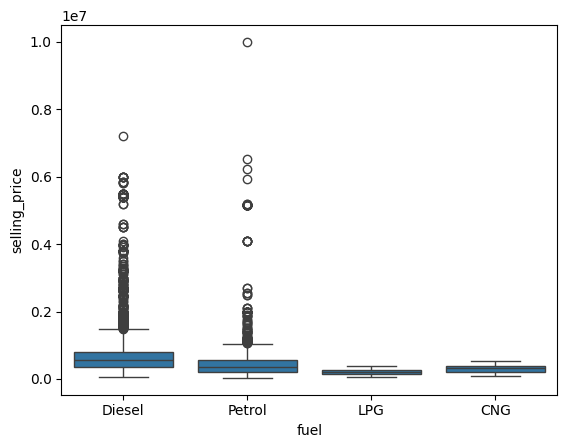

In [8]:
sns.boxplot(
    data=df,
    x='fuel',
    y='selling_price'
)
plt.show()

In [9]:
df['fuel'] = df['fuel'].replace({'LPG','CNG'},'others')
df['fuel'].unique()

array(['Diesel', 'Petrol', 'others'], dtype=object)

In [10]:
current_year=2026
df['year'] = current_year - df['year']
df.rename(columns={'year': 'age'}, inplace=True)

<Axes: xlabel='mileage(km/ltr/kg)', ylabel='selling_price'>

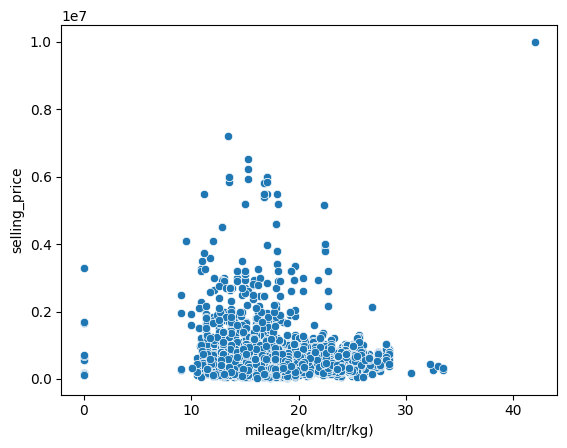

In [11]:
sns.scatterplot(x='mileage(km/ltr/kg)', y='selling_price', data=df)

<Axes: xlabel='mileage(km/ltr/kg)', ylabel='Count'>

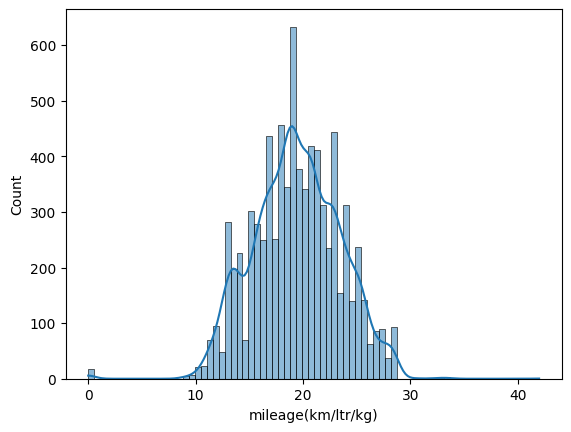

In [12]:
sns.histplot(df['mileage(km/ltr/kg)'], kde=True)

In [13]:
df.shape

(7907, 12)

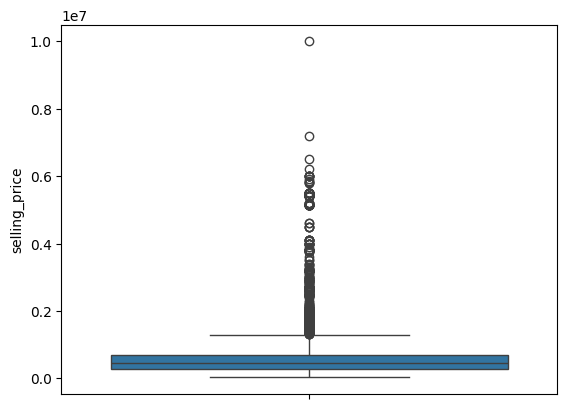

In [14]:
sns.boxplot(
    df['selling_price']
)
plt.show()

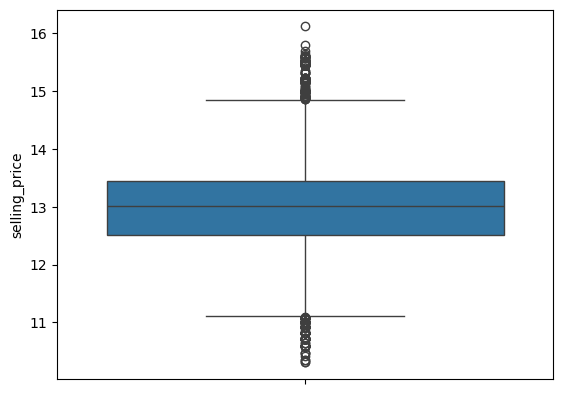

In [15]:
df['selling_price'] = np.log1p(df['selling_price'])
sns.boxplot(
    df['selling_price']
)
plt.show()

In [16]:
df.sort_values('selling_price', ascending=False).head(5)

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
170,Volvo XC90 T8 Excellence BSIV,9,16.118096,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400,4.0
2938,BMW X7 xDrive 30d DPE,6,15.789592,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,265,7.0
4952,Audi A6 35 TFSI Matrix,7,15.690845,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4950,Audi A6 35 TFSI Matrix,7,15.643763,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
5258,Mercedes-Benz S-Class S 350 CDI,9,15.607270,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,5.0


Numeric columns: Index(['age', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine',
       'seats'],
      dtype='object')


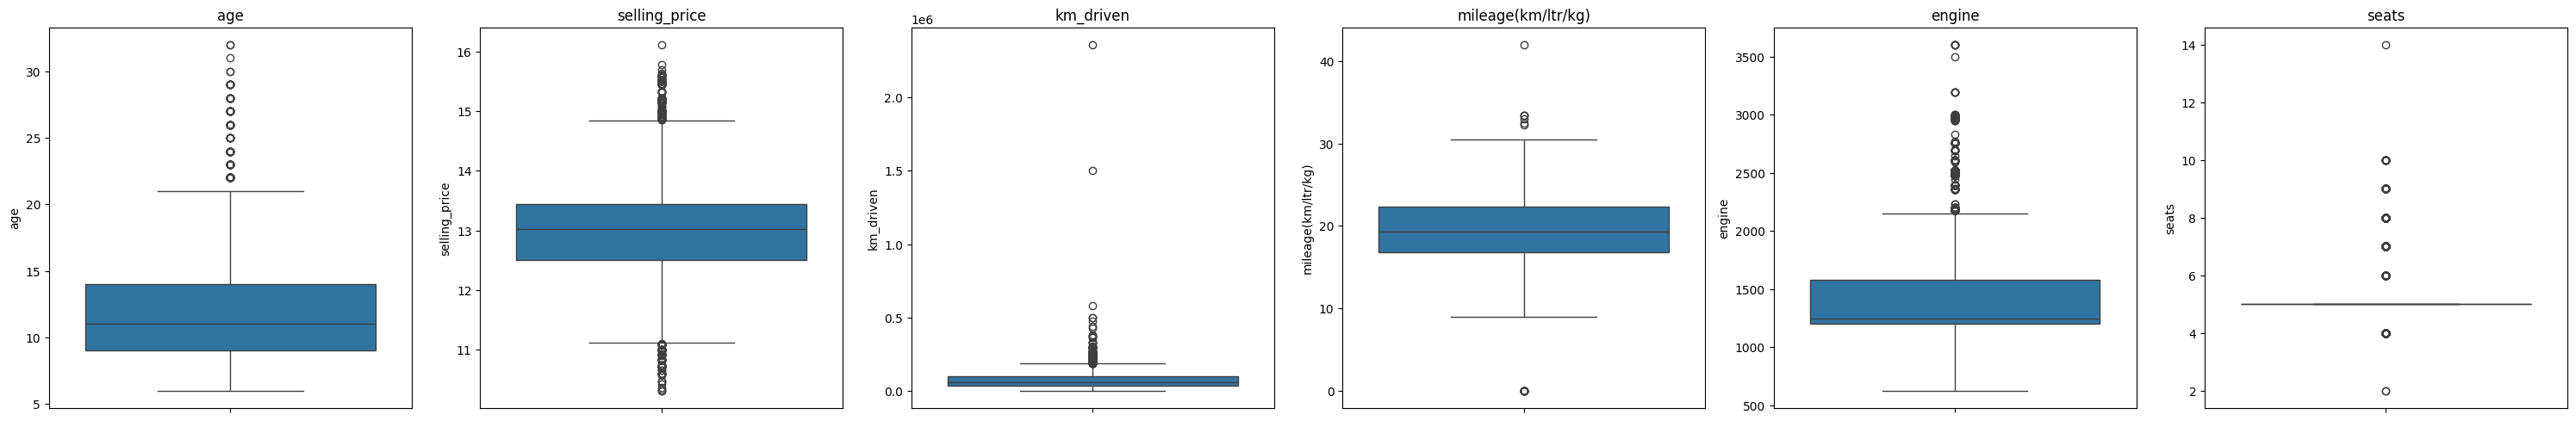

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

# Set up the plot horizontally
plt.figure(figsize=(5 * len(numeric_cols), 5))  # width depends on number of columns

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df[col])  # use y for vertical boxplot
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

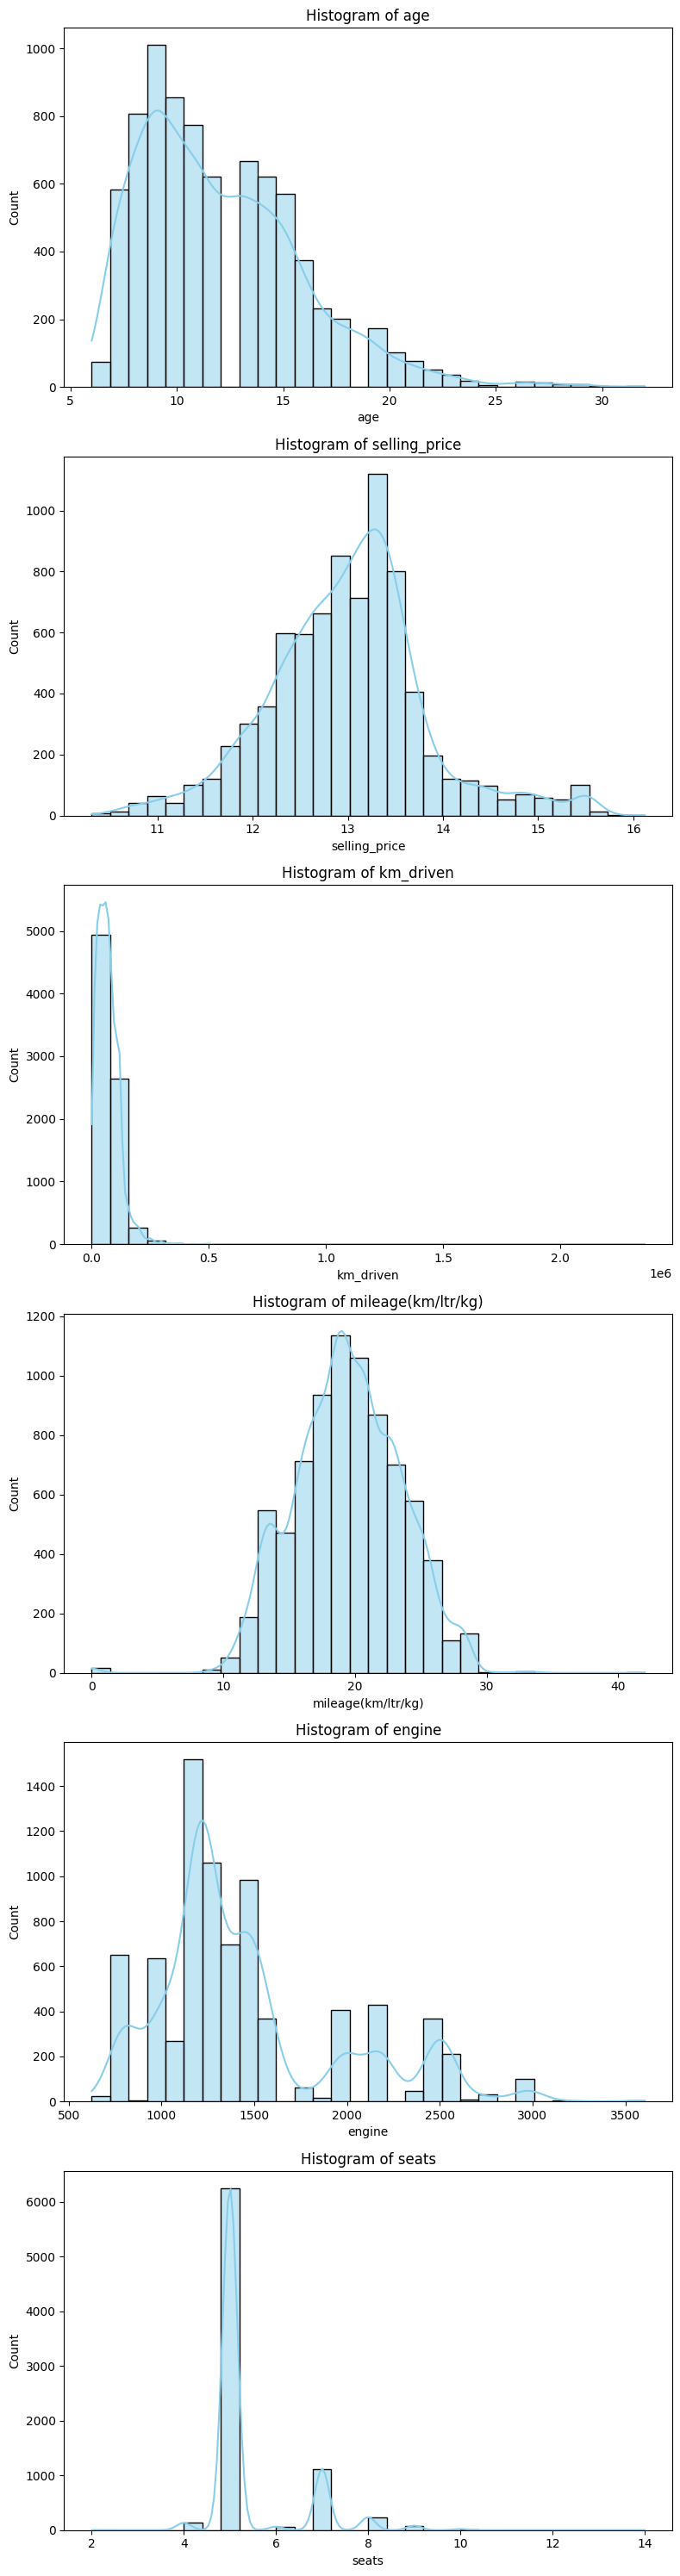

In [18]:
plt.figure(figsize=(8, 5 * len(numeric_cols)))  # taller for vertical arrangement

# Plot each numeric column as a vertical histogram
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)  # len(numeric_cols) rows, 1 column
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')  # vertical histogram with KDE
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
print(df['engine'].skew())

1.1352691298499176


<Axes: xlabel='km_driven_log', ylabel='Count'>

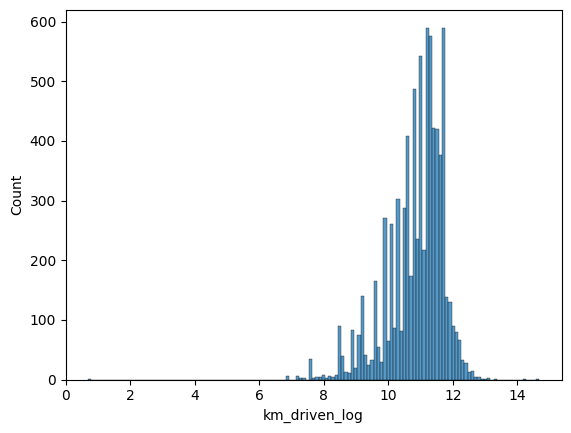

In [20]:
df['km_driven_log'] = np.log1p(df['km_driven'])
sns.histplot(df['km_driven_log'])

In [21]:
df['km_driven'] = df['km_driven_log']
df['engine'] = np.log1p(df['engine'])
df.drop(columns={'km_driven_log'},inplace=True)

<Axes: xlabel='engine', ylabel='Count'>

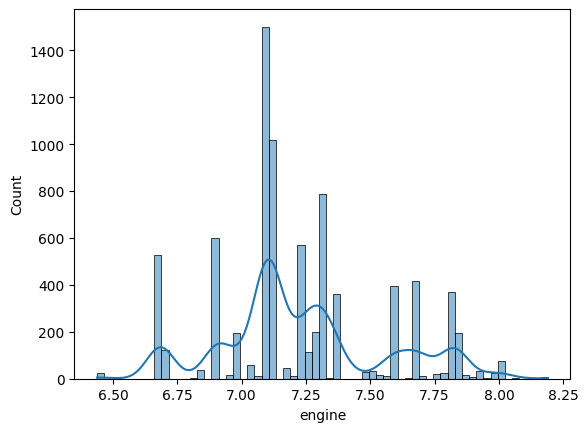

In [22]:
sns.histplot(df['engine'], kde=True)

In [23]:
print(df['engine'].skew())

0.41662246131542297


Numeric columns: Index(['age', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine',
       'seats'],
      dtype='object')


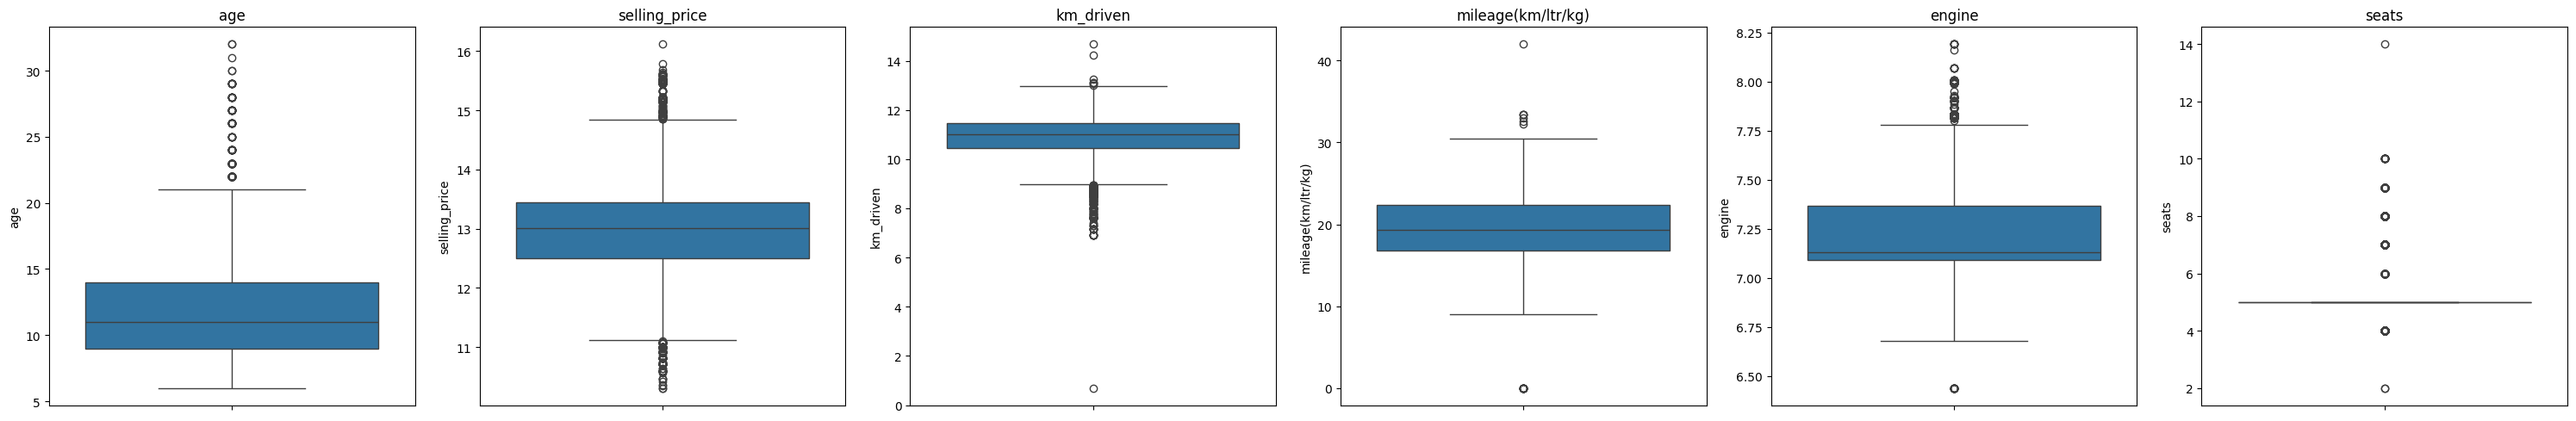

In [24]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

# Set up the plot horizontally
plt.figure(figsize=(5 * len(numeric_cols), 5))  # width depends on number of columns

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df[col])  # use y for vertical boxplot
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

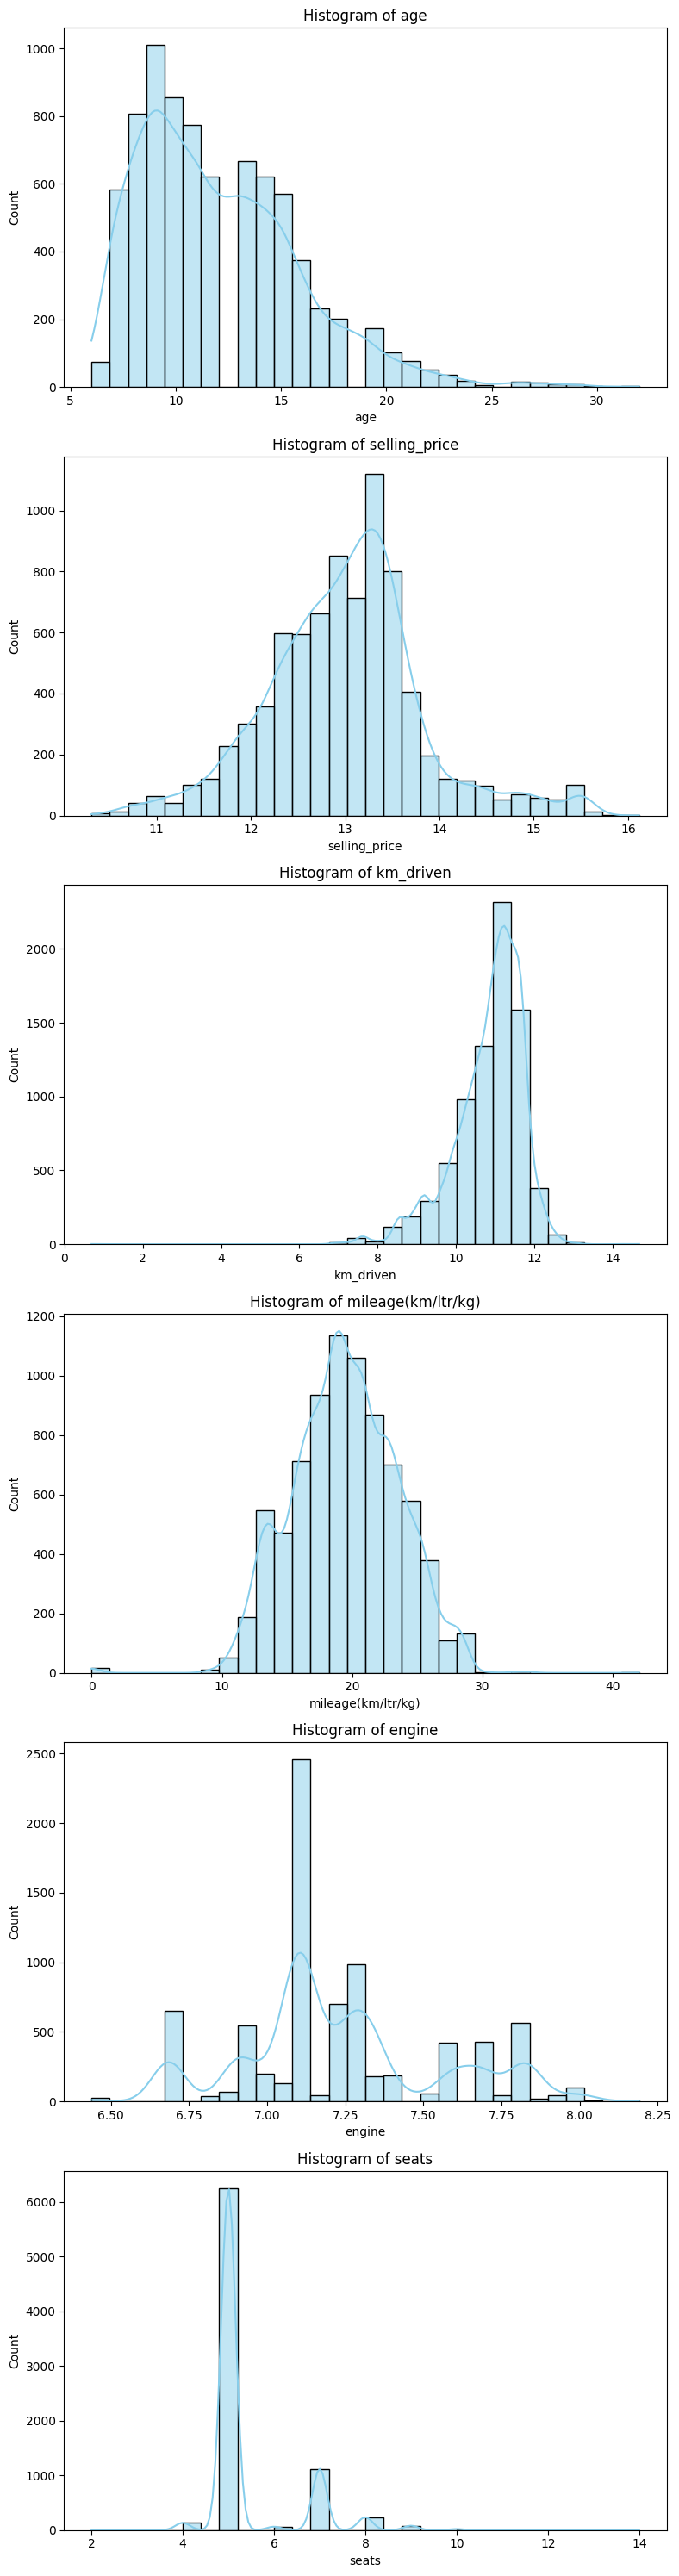

In [25]:
plt.figure(figsize=(8, 5 * len(numeric_cols)))  # taller for vertical arrangement

# Plot each numeric column as a vertical histogram
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)  # len(numeric_cols) rows, 1 column
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')  # vertical histogram with KDE
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<h2>Lets nake pipeline</h2>

In [26]:
df

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,12,13.017005,11.887938,Diesel,Individual,Manual,First Owner,23.40,7.130099,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,12,12.821261,11.695255,Diesel,Individual,Manual,Second Owner,21.14,7.312553,103.52,5.0
2,Honda City 2017-2020 EXi,20,11.970357,11.849405,Petrol,Individual,Manual,Third Owner,17.70,7.311886,78,5.0
3,Hyundai i20 Sportz Diesel,16,12.323860,11.751950,Diesel,Individual,Manual,First Owner,23.00,7.242082,90,5.0
4,Maruti Swift VXI BSIII,19,11.775297,11.695255,Petrol,Individual,Manual,First Owner,16.10,7.169350,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,13,12.676079,11.608245,Petrol,Individual,Manual,First Owner,18.50,7.088409,82.85,5.0
8124,Hyundai Verna CRDi SX,19,11.813037,11.686887,Diesel,Individual,Manual,Fourth & Above Owner,16.80,7.309212,110,5.0
8125,Maruti Swift Dzire ZDi,17,12.853179,11.695255,Diesel,Individual,Manual,First Owner,19.30,7.130099,73.9,5.0
8126,Tata Indigo CR4,13,12.577640,10.126671,Diesel,Individual,Manual,First Owner,23.57,7.242082,70,5.0


In [27]:
def extract_brand(col):
    return col.fillna('').str.split().str[0]

df['brand'] = extract_brand(df.iloc[:,0])
df.drop(columns={'name'}, inplace=True)

<Axes: xlabel='brand', ylabel='selling_price'>

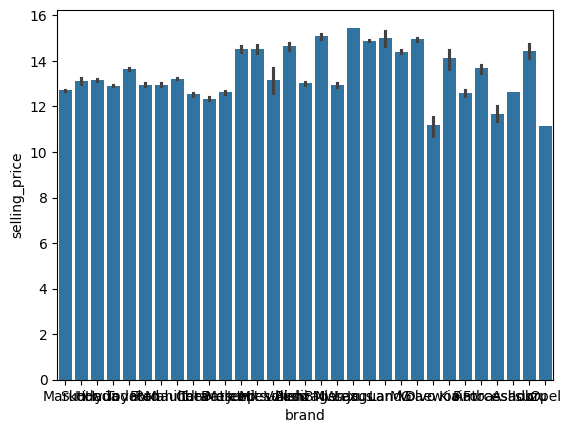

In [28]:
sns.barplot(
    x='brand',
    y='selling_price',
    data=df
)

In [29]:
df['max_power'] = df['max_power'].astype(str)

# Step 2: Remove 'bhp' and extra spaces
df['max_power'] = df['max_power'].str.replace('bhp', '', regex=False).str.strip()

# Step 3: Convert to numeric (coerce errors)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [30]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns={'selling_price'}),df.loc[:,'selling_price'], test_size=0.3, random_state=42)
x_train

,age,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand
4355,11,10.819798,Petrol,Individual,Manual,First Owner,14.28,7.494986,138.03,5.0,Toyota
6834,13,11.289794,Diesel,Individual,Manual,First Owner,12.99,7.822044,100.00,7.0,Toyota
4157,13,11.512935,Diesel,Individual,Manual,First Owner,23.57,7.242082,70.00,5.0,Tata
2570,7,9.546884,Diesel,Individual,Manual,First Owner,16.50,7.309212,70.00,7.0,Mahindra
1661,10,11.407576,Petrol,Individual,Manual,First Owner,16.80,6.680855,34.20,8.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
5373,11,11.156265,Diesel,Individual,Manual,First Owner,15.40,7.687080,120.00,7.0,Mahindra
5543,8,9.903538,Petrol,Individual,Manual,First Owner,18.20,7.090077,88.70,5.0,Honda
888,23,11.407576,Petrol,Individual,Manual,Second Owner,13.20,7.310550,94.00,5.0,Hyundai
7819,14,11.002117,Diesel,Individual,Manual,Second Owner,15.10,7.687080,140.00,7.0,Mahindra


In [32]:
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
category_cols = x_train.select_dtypes(include=['object']).columns.tolist()

category_cols

['fuel', 'seller_type', 'transmission', 'owner', 'brand']

In [33]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: impute + one-hot
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessor (single ColumnTransformer)
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, category_cols)
])





# Transform train and test
X_train_processed = preprocessor.fit_transform(x_train)

In [34]:
X_train_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 60874 stored elements and shape (5534, 48)>

In [35]:
X_train_dense = X_train_processed.toarray()
X_train_dense = pd.DataFrame(X_train_dense)
X_train_dense

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.255770,-0.029804,-1.276287,0.817254,1.278320,-0.432857,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.257625,0.501679,-1.595029,1.835639,0.229679,1.672090,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.257625,0.754012,1.019153,0.029768,-0.597543,-0.432857,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.282559,-1.469247,-0.727753,0.238796,-0.597543,1.672090,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.512467,0.634869,-0.653627,-1.717769,-1.584695,2.724563,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,-0.255770,0.350680,-0.999549,1.415392,0.781160,1.672090,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5530,-1.025862,-1.065934,-0.307705,-0.443543,-0.081908,-0.432857,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531,2.824599,0.634869,-1.543141,0.242962,0.064234,-0.432857,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5532,0.514323,0.176366,-1.073675,1.415392,1.332641,1.672090,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [37]:
model = LinearRegression()

# KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- R² ---
r2_scores = cross_val_score(model, X_train_dense, y_train, cv=cv, scoring='r2')
print("R² scores per fold:", r2_scores)
print("Mean R²:", r2_scores.mean())

# --- MSE ---
mse_scores = cross_val_score(model, X_train_dense, y_train, cv=cv, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # convert to positive
print("MSE scores per fold:", mse_scores)
print("Mean MSE:", mse_scores.mean())

# --- MAE ---
mae_scores = cross_val_score(model, X_train_dense, y_train, cv=cv, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores
print("MAE scores per fold:", mae_scores)
print("Mean MAE:", mae_scores.mean())

# --- MAPE (custom scorer) ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)  # lower is better
mape_scores = cross_val_score(model, X_train_dense, y_train, cv=cv, scoring=mape_scorer)
mape_scores = -mape_scores
print("MAPE scores per fold (%):", mape_scores)
print("Mean MAPE (%):", mape_scores.mean())

R² scores per fold: [0.91720704 0.91829504 0.9196654  0.91301429 0.90501184]
Mean R²: 0.9146387226344569
MSE scores per fold: [0.05725243 0.05669462 0.05471952 0.05831861 0.06462018]
Mean MSE: 0.05832106916676301
MAE scores per fold: [0.18293368 0.18042035 0.1765895  0.18437804 0.19211505]
Mean MAE: 0.18328732338945014
MAPE scores per fold (%): [1.43157016 1.41149842 1.37536603 1.44364141 1.49897672]
Mean MAPE (%): 1.432210549487929


In [38]:
# Model
model = LinearRegression()

# Full pipeline
pipeline = Pipeline([
    ('process', preprocessor),
    ('model', model)
])

# Fit pipeline on training data
pipeline.fit(x_train, y_train)


,steps,"[('process', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred = pipeline.predict(x_test)

In [40]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE
mape_value = mape(y_test, y_pred)

print(f"MAPE: {mape_value:.2f}%")

MAPE: 1.47%


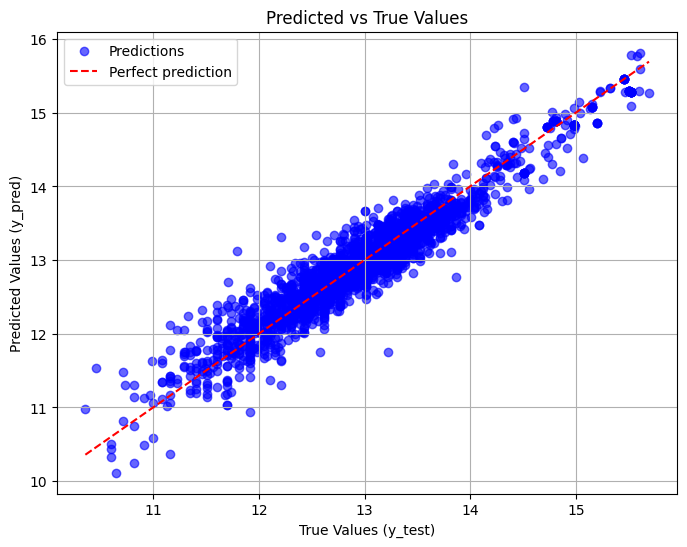

In [41]:
# Scatter plot of predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()